## UN Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Q4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows

In [3]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [ ]:
gdp_df.head(10)

In [ ]:
gdp_df.tail(10)

#### Q5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
#drop column: df.drop(columns=['col_name'])
#rename column: df.rename(columns={""oldname": "newname"})
gdp_df = (
    gdp_df
    .drop(columns=['Value Footnotes'])
    .rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
)
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


#### Q6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

7662 rows and 3 columns:
1. Country - object
2. Year - integer
3. GDP_Per_Capita - float

In [ ]:
gdp_df.shape

In [ ]:
gdp_df.info()

#### Q7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

1990 - 2022 (2022 is hidden between 2001 and 2002!)  
The number of observations per year increases over time.

In [ ]:
gdp_df['Year'].unique()

In [ ]:
gdp_df['Year'].value_counts(sort=False)

#### Q8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

242 Countries (and Regions)  
Djibouti and Somalia have the fewest entries; they didn't start reporting or tracking until 2013 (maybe it's voluntary?)?

In [ ]:
gdp_df['Country'].nunique()

In [ ]:
gdp_df['Country'].unique()

In [ ]:
gdp_df['Country'].value_counts()

In [ ]:
gdp_df.loc[gdp_df['Country'] == 'Djibouti']

In [ ]:
gdp_df.loc[gdp_df['Country'] == 'Somalia']

In [ ]:
gdp_df.loc[gdp_df['Country'] == 'Afghanistan']

#### Q9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021

In [9]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == 2021]
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
21,Africa Eastern and Southern,2021,3519.174840
54,Africa Western and Central,2021,4014.607965
87,Albania,2021,14595.944386
120,Algeria,2021,11029.138782
...,...,...,...
7502,Viet Nam,2021,10628.219166
7535,West Bank and Gaza,2021,5641.044400
7564,World,2021,17055.357429
7597,Zambia,2021,3236.788981


#### Q10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [ ]:
gdp_2021['GDP_Per_Capita'].describe()

#### Q11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

The distribution is heavily right-skewed, with most countries/regions at or below a GDP of 20K.

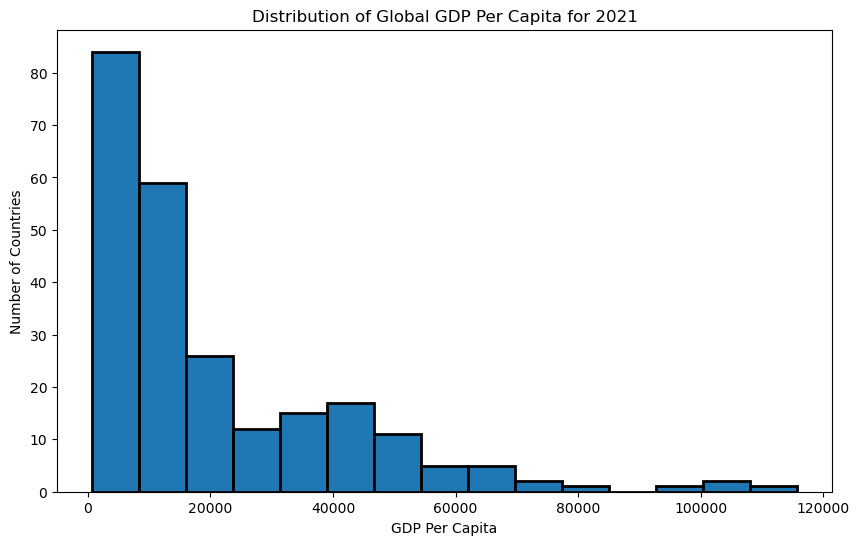

In [11]:
fig,ax = plt.subplots(figsize = (10,6))   

plt.hist(
    data=gdp_2021,
    x='GDP_Per_Capita',
    edgecolor='Black',
    linewidth=2,
    bins = 15
    );
plt.xlabel('GDP Per Capita')                            
plt.ylabel('Number of Countries')
plt.title('Distribution of Global GDP Per Capita for 2021');

#### Q12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [ ]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False)

#### Q13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [13]:
gdp_pivotedtotal = gdp_df.pivot_table(values = "GDP_Per_Capita", index = "Country", columns = 'Year')
gdp_pivotedtotal

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1517.016266,NaN
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
West Bank and Gaza,NaN,NaN,NaN,NaN,3951.205493,4047.128488,3916.925775,4294.746098,4786.480236,5052.064072,...,6118.257181,5967.073437,6048.976597,6438.933640,6401.740891,6318.210068,6245.448697,5402.538773,5641.044400,5722.409175
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


In [17]:
gdp_subset = gdp_df[gdp_df["Year"].isin([1990, 2001])]
gdp_subset

,Country,Year,GDP_Per_Capita
41,Africa Eastern and Southern,2001,2928.062946
52,Africa Eastern and Southern,1990,3037.297466
74,Africa Western and Central,2001,2734.257633
85,Africa Western and Central,1990,2788.301039
107,Albania,2001,6441.440698
...,...,...,...
7595,World,1990,9705.981267
7617,Zambia,2001,2142.787524
7628,Zambia,1990,2290.039226
7650,Zimbabwe,2001,2772.325234


In [23]:
gdp_pivoted = gdp_subset.pivot_table(values = "GDP_Per_Capita", index = "Country", columns = 'Year')
gdp_pivoted

Year,1990,2001
Country,,
Africa Eastern and Southern,3037.297466,2928.062946
Africa Western and Central,2788.301039,2734.257633
Albania,4827.027705,6441.440698
Algeria,8828.874473,8926.110134
Angola,5793.084512,4768.008894
...,...,...
Viet Nam,2099.394649,3879.338958
West Bank and Gaza,NaN,3980.933349
World,9705.981267,11221.662910


In [31]:
gdp_pivoted = gdp_pivoted.dropna()
gdp_pivoted

Year,1990,2001
Country,,
Africa Eastern and Southern,3037.297466,2928.062946
Africa Western and Central,2788.301039,2734.257633
Albania,4827.027705,6441.440698
Algeria,8828.874473,8926.110134
Angola,5793.084512,4768.008894
...,...,...
Vanuatu,2774.138350,2782.053642
Viet Nam,2099.394649,3879.338958
World,9705.981267,11221.662910


#### Q14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [ ]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2001] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

#### Q15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [53]:
gdp_pivoted['Percent_Change'].agg(lambda x: sum(x < 0))

56

#### Q16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?.

#### Bonus: Put both line charts on the same plot.